<a href="https://colab.research.google.com/github/TheRealKraytonian/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/The_Kraytonian_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
sales=[3505,2400,3027,2798,3700,3250,3689]

In [0]:
import math
import numpy as np
import pandas as pd

In [0]:
total = sum(sales)
mean_sales = total/len(sales)
print("mean sales:", mean_sales)

mean sales: 3195.5714285714284


In [0]:
def subtract_mean(number):
  return number-mean_sales
  
lambda x: x-mean_sales    

<function __main__.<lambda>>

In [0]:
dist = list(map(subtract_mean, sales))

In [0]:
squared_dist = list(map(lambda x: x**2, dist))

In [0]:
list_length=len(squared_dist)-1
list_length=len(squared_dist)

In [0]:
variance_sales = sum(squared_dist)/list_length
print('{:.2f}'.format(variance_sales,3))

202291.67


In [0]:
print('{:.2f}'.format(math.sqrt(variance_sales)))
print('{:.2f}'.format(np.sqrt(variance_sales)))

449.77
449.77


In [0]:
print(np.mean(sales))
print('{:.2f}'.format(np.var(sales)))
print('{:.2f}'.format(np.std(sales)))

3195.5714285714284
202291.67
449.77


In [0]:
df = pd.DataFrame({"sales": sales})
print('mean:', df['sales'].mean())

mean: 3195.5714285714284


In [0]:
print('var:', '{:.2f}'.format(df['sales'].var(ddof=0)))
print('std:', '{:.2f}'.format(df['sales'].std(ddof=0)))

var: 202291.67
std: 449.77


In [0]:
print('var:', '{:.2f}'.format(df['sales'].var(ddof=1)))
print('std:', '{:.2f}'.format(df['sales'].std(ddof=1)))

var: 236006.95
std: 485.81


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
lwsales = [127,80,105,92,120,115,93]

In [0]:
print('{:.2f}'.format(np.cov(sales, lwsales)[0][1]))

5675.79


In [0]:
df['lwsales'] = pd.Series(lwsales)
print('{:.2f}'.format(df.cov().values[0][1]))

5675.79


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
std_s = df['sales'].std(ddof=1)
std_lws =df['lwsales'].std(ddof=1)

In [0]:
print('{:.4f}'.format(std_s))
print('{:.4f}'.format(std_lws))

485.8055
17.0573


In [0]:
cov_slws = df['sales'].cov(df['lwsales'])
print('{:.4f}'.format(cov_slws))

5675.7857


In [0]:
denom = std_s*std_lws

In [0]:
corr_slws = cov_slws/denom
print('{:.6f}'.format(corr_slws))

0.684940


In [0]:
print('{:.6f}'.format(df['sales'].corr(df['lwsales'])))

0.684940


In [0]:
df.corr()

,sales,lwsales
sales,1.00000,0.68494
lwsales,0.68494,1.00000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
# source: https://www.kaggle.com/christophercorrea/dc-residential-properties/
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic.head(2)

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
titanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


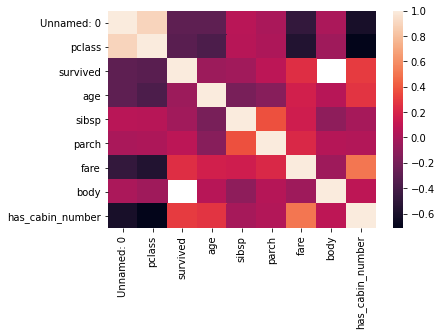

In [0]:
import seaborn as sns
sns.heatmap(titanic.corr());

In [0]:
titanic.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


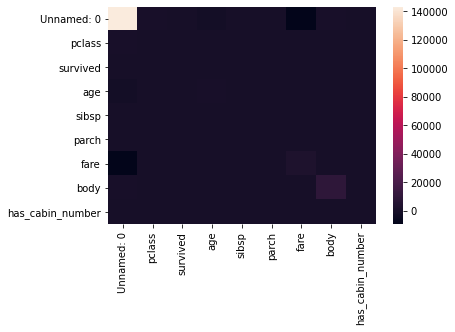

In [0]:
sns.heatmap(titanic.cov());

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
vector_1 = [2,2]
vector_2 = [1, -1]

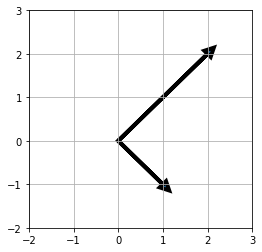

In [0]:
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-2,3)
plt.ylim(-2,3)

for vect in [vector_1,vector_2]:
  plt.arrow(0,0, vect[0], vect[1], head_width=.2, head_length=0.2, linewidth=4)
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
a = np.array([-5,3,7])
b = np.array([6,-8,2])
np.dot(a,b)

-40

In [0]:
#dot plot is not zero so not orthogonal/perpendicular

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c=([2,-15,6,20])

In [0]:
np.dot(c,c)

665

In [0]:
np.multiply(c,c)

array([  4, 225,  36, 400])

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Your text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = [4,12,11,9,2]

In [0]:
norm_f = np.linalg.norm(f)

In [0]:
f_hat = f/np.linalg.norm(f)

In [0]:
f_hat_norm = np.linalg.norm(f_hat)
print(f_hat_norm)

0.9999999999999999


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
vector_g = np.array([1,2])
vector_h = np.array([4,8])

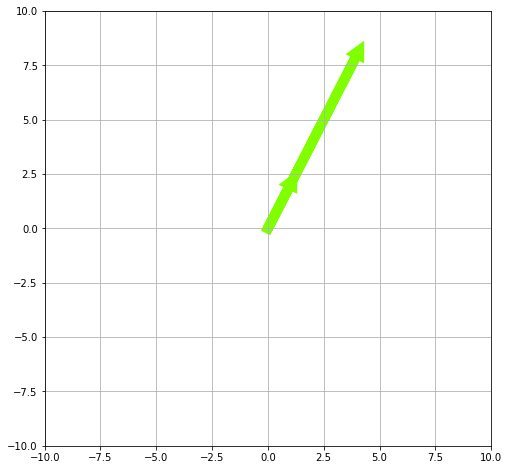

In [0]:
fig, ax = plt.subplots(figsize=(8,8))
ax.grid()
plt.xlim(-10,10)          
plt.ylim(-10,10)

for myvect in [vector_g, vector_h]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=10, 
              color='chartreuse')

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
vector_1 = np.array([1,2,3]) 
vector_2 = np.array([-1,0,7]) 
vector_3 = np.array([4,8,2]) 

In [0]:
a,b,c=(4,10,12)
linear_combo = np.multiply(vector_1,a) + np.multiply(vector_2,b) + np.multiply(vector_3,c)
print(linear_combo)

[ 42 104 106]


In [0]:
# This is a set of several linear combinations:
muchos_combos=[]
for (a,b,c) in [(,,),]:
    linear_combo = np.multiply(vector_1, a) + np.multiply(vector_2, b) + np.multiply(vector_3, c) 
    muchos_combos.append(linear_combo)
print(muchos_combos)

[array([8, 9]), array([14, 17]), array([20, 25]), array([26, 33])]


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



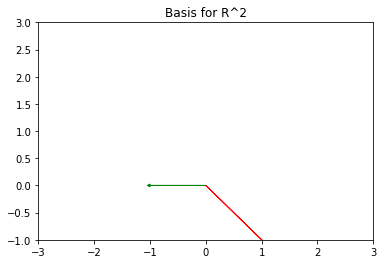

In [0]:
vector_1 = [-2,2]
vector_1 = [2,-2]

plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-3,3)          
plt.ylim(-1,3)
plt.title("Basis for R^2")
plt.show()

## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
P = np.array([[1,2,3],
              [-1,0,7],
              [4,8,2]])
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

3 vectors

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
v = np.array([1,3])
w = np.array([-1,2])

In [0]:
w_dot_v = np.dot(v, w)
v_dot_v = np.dot(v, v)

In [0]:
fraction = w_dot_v/v_dot_v
projection = np.multiply(fraction,v)
print(projection)

[0.5 1.5]


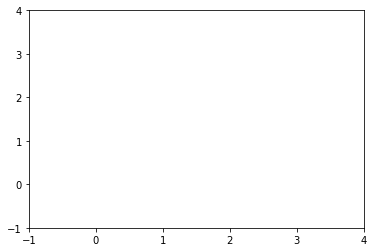

In [0]:
plt.xlim(-1,4)          
plt.ylim(-1,4)
axes = plt.gca()

In [0]:
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


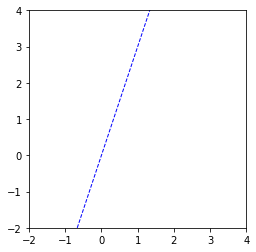

In [0]:
plt.xlim(-2,4)          
plt.ylim(-2,4)

axes = plt.gca()
plt.axes().set_aspect('equal')

plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

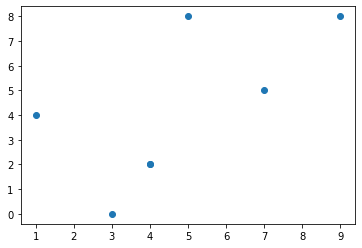

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()